<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/yotarazona/scikit-eo/blob/main/examples/notebooks/01.%20Machine_Learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 01 Machine Learning</font></div>_**

In this example, in a small region of southern Brazil, optical imagery from Landsat-8 OLI (Operational Land Imager) will be used to classify land cover using the machine learning algorithm Random Forest (RF) [(Breiman, 2001)](https://doi.org/10.1023/A:1010933404324). Four types of land cover will be mapped, i.e., agriculture, forest, bare soil and water. The input data needed is the satellite image and the spectral signatures collected. The output as a dictionary will provide: i) confusion matrix, ii) overall accuracy, iii) kappa index and iv) a classes map.

# 1.0 Libraries

To install ```scikit-eo``` you can do it with the following line:

In [67]:
pip install scikeo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Libraries to be used:

In [69]:
import rasterio
import numpy as np
from scikeo.mla import MLA
#from scikeo.process import extract
import matplotlib.pyplot as plt
from dbfread import DBF
import matplotlib as mpl
import pandas as pd
import geopandas as gpd
from scikeo.plot import plotRGB
from scikeo.writeRaster import writeRaster

Reading dataset directly from the external server (GitHub in this case). To do this, ```requests```, ```zipfile``` and ```io``` will be installed before. Then you will only need to run the following line:h_raster)).

In [71]:
import os

# Check if the file exists
path_raster = "D:/RSnotebook/scikit-eo-main/tests/data/LC08_232066_20190727.tif"
print(os.path.exists(path_raster))  # Should return True if the file is found


True


In [73]:
# Load the satellite image (provide the actual path where your image is stored)
path_raster = "D:/RSnotebook/scikit-eo-main/tests/data/LC08_232066_20190727.tif"  # Update this path
img = rasterio.open(path_raster)


# Load the endmembers shapefile (classes)
path_endm = "D:/RSnotebook/scikit-eo-main/tests/data/endmembers.shp"  # Update this path
endm = gpd.read_file(path_endm)
print(endm)

    class  b1_LC08_23  b2_LC08_23  b3_LC08_23  b4_LC08_23  b5_LC08_23  \
0     2.0         203         399         261        2859        1349   
1     0.0         647        1126        1422         545          49   
2     2.0         197         374         222        2937        1220   
3     2.0         213         414         244        3440        1454   
4     2.0         228         463         289        3684        1501   
..    ...         ...         ...         ...         ...         ...   
86    2.0         265         431         289        3061        1545   
87    1.0         742        1101        1357        1777        1963   
88    1.0         675        1175        1530        2086        2991   
89    2.0         233         389         245        2993        1291   
90    2.0         276         449         308        3024        1568   

    b6_LC08_23                        geometry  
0          548  POINT (402229.206 -963091.723)  
1           31   POINT (3

In [75]:
# Open the raster image
with rasterio.open(path_raster) as img:
    raster_crs = img.crs
    print("CRS of the raster image:", raster_crs)

# Open the vector shapefile
endm = gpd.read_file(path_endm)
vector_crs = endm.crs
print("CRS of the vector shapefile:", vector_crs)

CRS of the raster image: PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
CRS of the vector shapefile: EPSG:32620


In [77]:
# Reproject the vector data to match the raster's CRS
endm_reprojected = endm.to_crs(raster_crs)
print("CRS of the vector shapefile after transformation:", endm_reprojected.crs)

# Optionally, save the reprojected shapefile to a new file
endm_reprojected.to_file("D:/RSnotebook/scikit-eo-main/tests/data/endmembers_reprojected.shp")

CRS of the vector shapefile after transformation: PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [81]:
with rasterio.open("D:/RSnotebook/scikit-eo-main/tests/data/LC08_232066_20190727.tif") as img:
    # Now perform the extraction
    endm_reprojected = extract(img, endm_reprojected)

# Proceed with further processing
print(endm_reprojected)

    class  band1  band2  band3  band4  band5  band6
0     2.0    203    399    261   2859   1349    548
1     0.0    647   1126   1422    545     49     31
2     2.0    197    374    222   2937   1220    485
3     2.0    213    414    244   3440   1454    557
4     2.0    228    463    289   3684   1501    569
..    ...    ...    ...    ...    ...    ...    ...
86    2.0    265    431    289   3061   1545    619
87    1.0    742   1101   1357   1777   1963   1735
88    1.0    675   1175   1530   2086   2991   2639
89    2.0    233    389    245   2993   1291    493
90    2.0    276    449    308   3024   1568    655

[91 rows x 7 columns]


Instance of ```mla()```:

In [89]:
with rasterio.open("D:/RSnotebook/scikit-eo-main/tests/data/LC08_232066_20190727.tif") as img:
  inst = MLA(image = img, endmembers = endm_reprojected)

Applying Random Forest with 80% of data to train

In [91]:
rf_class = inst.RF(training_split = 0.8)

## 4.0 Results

Dictionary of results

In [93]:
rf_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

Overall accuracy

In [95]:
rf_class.get('Overall_Accuracy')

1.0

Kappa index

In [97]:
rf_class.get('Kappa_Index')

1.0

Confusion matrix or error matrix

In [99]:
matrix = rf_class.get('Confusion_Matrix')
matrix

,0.0,1.0,2.0,3.0,Total,Users_Accuracy,Commission
0.0,3.0,0.0,0.0,0.0,3.0,100.0,0.0
1.0,0.0,7.0,0.0,0.0,7.0,100.0,0.0
2.0,0.0,0.0,6.0,0.0,6.0,100.0,0.0
3.0,0.0,0.0,0.0,3.0,3.0,100.0,0.0
Total,3.0,7.0,6.0,3.0,NaN,NaN,NaN
Producer_Accuracy,100.0,100.0,100.0,100.0,NaN,NaN,NaN
Omission,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [101]:
# saving this confusion matrix as a .csv file
matrix.to_csv('D:/RSnotebook/scikit-eo-main/tests/data//confusion_matrix.csv', sep = ';', index = True, header=True)

Preparing the image before plotting

In [103]:
# Let's define the color palette
palette = mpl.colors.ListedColormap(['dodgerblue','#e84855','darkgreen','#ADC178'])

Applying the ```plotRGB``` algorithm is easy:

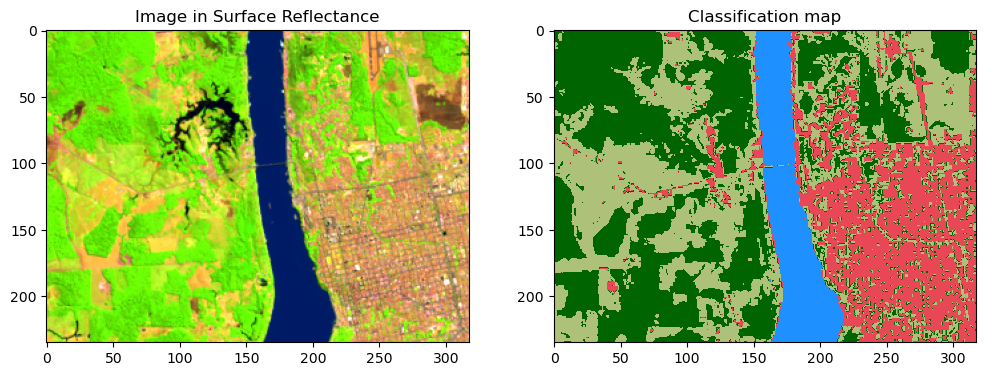

In [107]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

# satellite image
with rasterio.open("D:/RSnotebook/scikit-eo-main/tests/data/LC08_232066_20190727.tif") as img:
   plotRGB(img, bands = [5, 4, 3], title = 'Image in Surface Reflectance', ax = axes[0])

# class results
axes[1].imshow(rf_class.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

Finally, it is possible to save our result as raster class (.tif). We will use the ```writeRaster()``` function to do it.

Arguments:
- arr: array of predicted classes
- image: image read by rasterio.open()
- filename: name
- filepath: path to be saved
- n: number of array to be saved. In this case is one because we are only saving one array (2d) with rows and cols.

In [117]:
#writeRaster(arr = rf_class.get('D:/RSnotebook/scikit-eo-main/tests/data/Classification_Map_result'), image = img, filename = 'LC08_232066_20190727_Label',
   #filepath = 'D:/RSnotebook/scikit-eo-main/tests/data', n = 1)

In [115]:
writeRaster(arr = rf_class.get('Classification_Map'), image = img, filename = 'LC08_232066_20190727_Label',
   filepath = 'D:/RSnotebook/scikit-eo-main/tests/data', n = 1)